In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
ride_df = pd.merge(city_data, ride_data,on = "city")

# Display the data table for preview
ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Overview

In [2]:
# Get the city types and the city names
city_type = ride_df["type"].unique()
city = ride_df["city"].unique()

# Get initial data about the cities
city_count = len(city) # number of cities
city_type_count = len(city_type) # number of city types

# create a groupby object to get summary data
city_grped = ride_df.groupby(["city","type"])

no_rides = city_grped["ride_id"].count() # number of rides per city
ride_count = no_rides.sum()

no_drivers = city_grped["driver_count"].mean() # number of drivers per city
driver_count = no_drivers.count()

# Summary table
summary = pd.DataFrame({"No. of cities": [city_count],
                        "No. of city types": [city_type_count],
                        "No. of rides": [ride_count],
                        "No. of drivers": [driver_count]})
summary

,No. of cities,No. of city types,No. of rides,No. of drivers
0,120,3,2375,120


## Bubble Plot of Ride Sharing Data

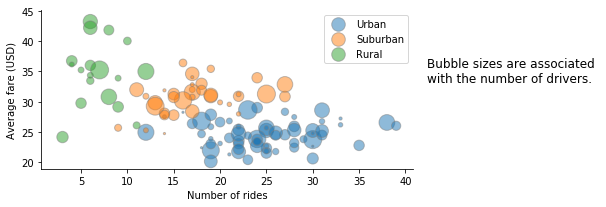

In [3]:
# Obtain the x and y coordinates for each of the three city types

ave_fare = round(city_grped["fare"].mean(),2) # average fare per city

# create new dataframe to contain the data extracted from the groupby object
w = pd.DataFrame({"no_rides": no_rides,
                  "ave_fare": ave_fare,
                  "no_drivers": no_drivers})

w1 = w.reset_index() # to access the grouping variables from the previous groupby
z = no_drivers

labels = list(w1["type"].unique()) # list of city types 

# Plot the bubble plot
fg = seaborn.FacetGrid(data=w1, hue='type', hue_order=labels, aspect = 2)

fg1= fg.map(plt.scatter,"no_rides", "ave_fare",
            s = 5 * z, alpha = 0.5, edgecolor = "grey")

plt.xlabel("Number of rides")
plt.ylabel("Average fare (USD)")
plt.legend() # insert legend
plt.gcf().text(1, 0.6, "Bubble sizes are associated \nwith the number of drivers.", fontsize=12) # annotation

# Save Figure
plt.savefig("Images/bubble.png")
plt.show()

## City Type Distribution

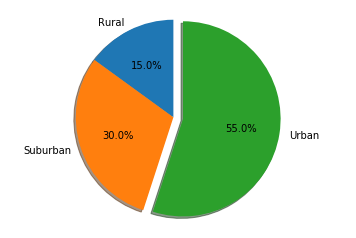

In [4]:
# Group the cities based on type
t = city_grped["fare"].count()
t1 = t.groupby("type")
city_dist = t1.count()

# Pie chart
type_list = sorted(list(city_type))
explode = [0, 0, 0.1]
plt.pie(city_dist, labels = type_list, explode = explode, startangle = 90, shadow = True, autopct = "%1.1f%%")
plt.axis("equal")

# Save plot
plt.savefig("Images/pie_city_count.png")

In [5]:
# Show plot
plt.show()

## Total Fares by City Type

           fare
type           
Rural      6.81
Suburban  30.46
Urban     62.72


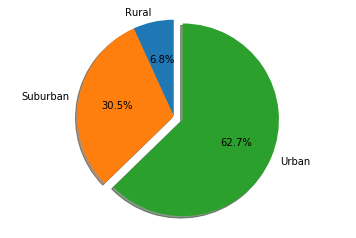

In [6]:
# Calculate Type Percents
tot_fare = city_grped["fare"].sum()
tot_fare1 = tot_fare.reset_index()

tot_fare_gb = tot_fare1.groupby("type")
tot_fare = tot_fare_gb.sum() # sum of fares

pct_fare = round(((tot_fare_gb.sum()/tot_fare_gb.sum().sum()) * 100),2)

print(pct_fare)

# Build Pie Chart
type_list = sorted(list(city_type))
explode = [0, 0, 0.1]
plt.pie(tot_fare, labels = type_list, explode = explode, startangle = 90, shadow = True, autopct = "%1.1f%%")
plt.axis("equal")

# Save Figure
plt.savefig("Images/pie_fare.png")

In [7]:
# Show Figure
plt.show()

## Total Rides by City Type

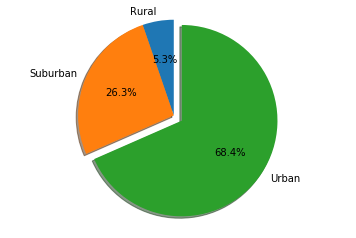

In [8]:
# Calculate Ride Percents
no_rides1 = no_rides.reset_index()
rides_grped = no_rides1.groupby("type")
tot_ride = rides_grped.sum()

# Build Pie Chart
plt.pie(tot_ride, labels = type_list, explode = explode, startangle = 90, shadow = True, autopct = "%1.1f%%")
plt.axis("equal")

# Save Figure
plt.savefig("Images/pie_ride.png")

In [9]:
# Show Figure
plt.show()

## Total Drivers by City Type

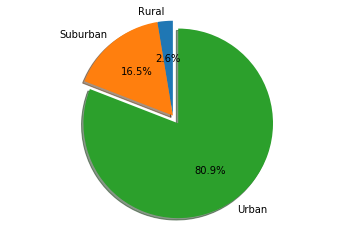

In [10]:
# Calculate Driver Percents
no_drivers1 = no_drivers.reset_index()
driver_grped = no_drivers1.groupby("type")
tot_driver = driver_grped.sum()

# Build Pie Charts
plt.pie(tot_driver, labels = type_list, explode = explode, startangle = 90, shadow = True, autopct = "%1.1f%%")
plt.axis("equal")

# Save Figure
plt.savefig("Images/pie_driver.png")

In [11]:
# Show Figure
plt.show()